# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import json
#import csv
from scipy import stats
from scipy.stats import linregress
#from datetime import date
#from config import weather_api_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []
#humidity = []
#lat = []
#lng = []
#max_temp =[]
#wind_speed = []
#cloudiness = []
#country = []
#date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"] ["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constantia
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | rio san juan
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | xai-xai
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | newport
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | sisimiut
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | nuku'alofa
Processing Record 22 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,constantia,44.1833,28.6500,276.53,83,35,4.34,RO,1738455347
1,stanley,54.8680,-1.6985,276.16,84,0,4.12,GB,1738455348
2,jamestown,42.0970,-79.2353,261.95,85,0,1.54,US,1738455349
3,rio san juan,19.6439,-70.0763,296.94,87,6,4.03,DO,1738455350
4,whitehorse,60.7161,-135.0538,248.32,62,78,2.68,CA,1738455229


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,276.53,83,35,4.34,RO,1738455347
1,stanley,54.8680,-1.6985,276.16,84,0,4.12,GB,1738455348
2,jamestown,42.0970,-79.2353,261.95,85,0,1.54,US,1738455349
3,rio san juan,19.6439,-70.0763,296.94,87,6,4.03,DO,1738455350
4,whitehorse,60.7161,-135.0538,248.32,62,78,2.68,CA,1738455229


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

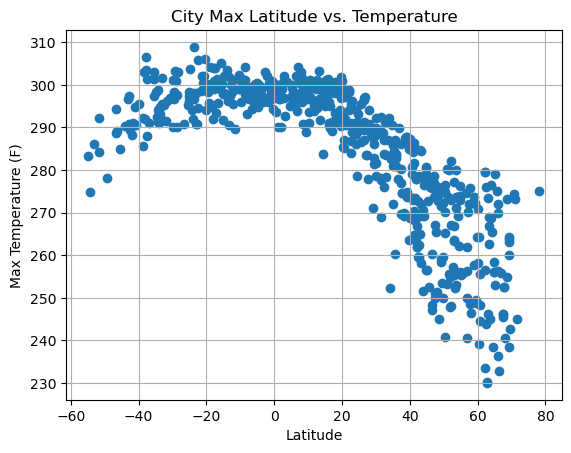

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.ylabel('Max Temperature (F)') 
plt.xlabel('Latitude')
#plt.xlim(-90,90)
#plt.ylim(-20,110)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

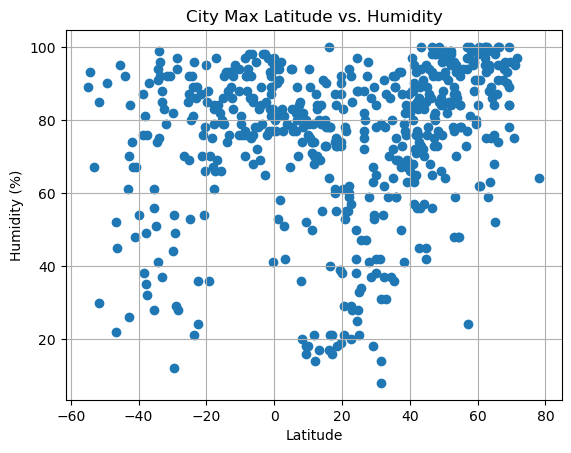

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title ('City Max Latitude vs. Humidity')
plt.ylabel ('Humidity (%)')
plt.xlabel ('Latitude')
#plt.xlim(-85,85)
#plt.ylim(0,110)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

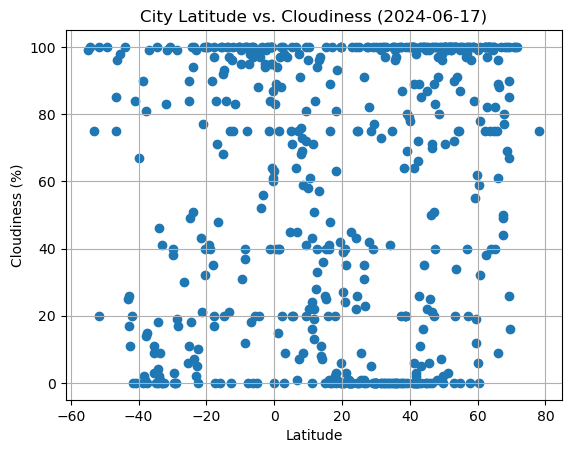

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
#plt.xlim(-85,85)
#plt.ylim(0,110)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

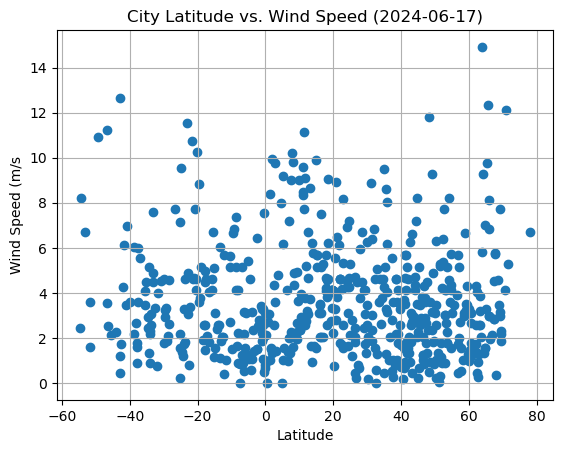

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.ylabel('Wind Speed (m/s')
plt.xlabel('Latitude')
#plt.xlim(-85,85)
#plt.ylim(0,35)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
#from scipy.stats import linregress
#from sklearn import datasets

def lin_reg_plt(x_vals, title='', xlab='', ann=(0, 0, '15')):

    (slope, intercept, rval, pval, stderr) = lingress(x_vals, y_vals)
    regress_vals = x_vals * slope + intercept

    plt.scatter(x_vals, y_vals, edgecolors='xkcd:black')
    plt.plot(x_vals, regress_vals, 'r-')
    plt.annotate(f"y ={slope:.2f}x + {intercept:.2f}", (ann[0],ann[1]), color='r', fontsize=ann[2])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    print(f'R value is {rval:.2f}')

    return
    

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constantia,44.1833,28.6500,276.53,83,35,4.34,RO,1738455347
1,stanley,54.8680,-1.6985,276.16,84,0,4.12,GB,1738455348
2,jamestown,42.0970,-79.2353,261.95,85,0,1.54,US,1738455349
3,rio san juan,19.6439,-70.0763,296.94,87,6,4.03,DO,1738455350
4,whitehorse,60.7161,-135.0538,248.32,62,78,2.68,CA,1738455229


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,atafu village,-8.5421,-172.5159,301.14,76,37,7.37,TK,1738455353
7,xai-xai,-25.0519,33.6442,296.20,92,11,0.23,MZ,1738455355
8,punta arenas,-53.1500,-70.9167,286.21,67,75,6.69,CL,1738455070
11,blackmans bay,-43.0167,147.3167,296.77,61,25,0.45,AU,1738455359
13,bredasdorp,-34.5322,20.0403,292.45,74,100,2.44,ZA,1738455362


###  Temperature vs. Latitude Linear Regression Plot

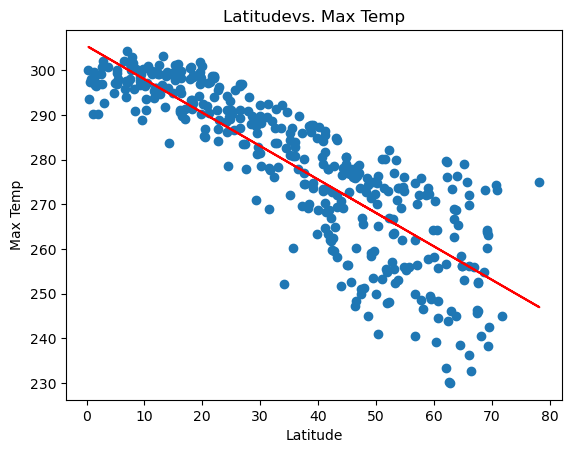

The r-value is: -0.8379505889689498


In [26]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_equ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Latitudevs. Max Temp")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equ,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f'The r-value is: {rvalue}')

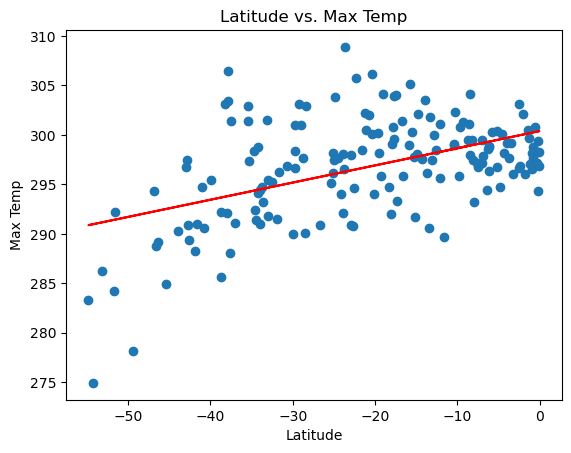

The r-value is: 0.49085181916223347


In [27]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Max Temp']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Latitude vs. Max Temp")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 1.	The linear relationship between the latitude of a city and the maximum temperature of that city today is very relevant. While it can’t always be said, it is a fair generalization to make the most of the time that: "The maximum temperature of a city will increase as you get closer to the equator." The most important caveat to this is that this relationship is approximately more valid when examining the Northern Hemisphere as opposed to the Southern Hemisphere. Another interesting and important factoid is that the temperature's relationship to the latitude becomes a greater factor the closer it is the equator, visually it seems that the range of the data set decreases along this trend and the data points become 
grouped tighter together. This makes sense here where the equator is generally considered to be the hottest parallel line around the Earth, but there will always be outliers depending on the climate and geography of the specific location. It's interesting how the data on the Southern Hemisphere becomes less representable as a linear trend though.


### Humidity vs. Latitude Linear Regression Plot

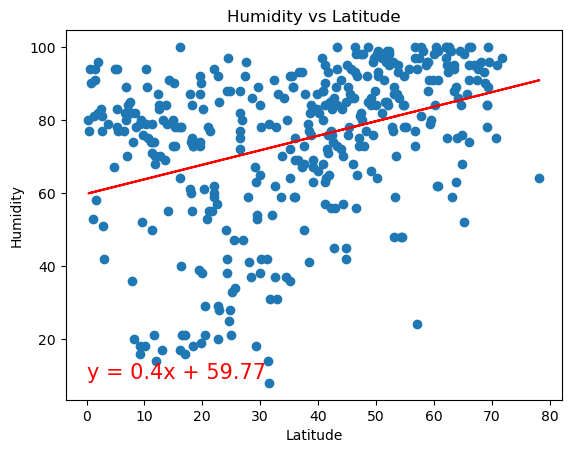

The r-value is: 0.36272940913904494


In [29]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Humidity']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Humidity vs Latitude")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f'The r-value is: {rvalue}')

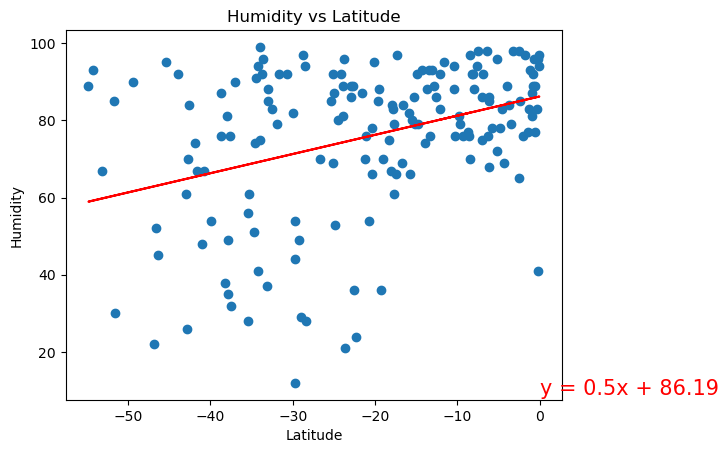

The r-value is: 0.36540176736979385


In [41]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Humidity']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Humidity vs Latitude")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** 2.	The humidity of cities depending on the Latitude still maintains somewhat of a relationship, at least with some Weak correlation for the Northern and Southern Hemispheres. However strongly they may correlate, the linear relationship between Latitude and Humidity is not very strong, especially in the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

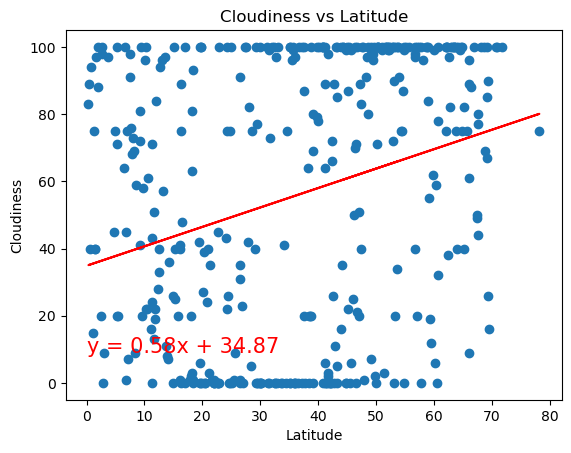

The r-value is: 0.27800285302561656


In [40]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Cloudiness']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Cloudiness vs Latitude")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f'The r-value is: {rvalue}')

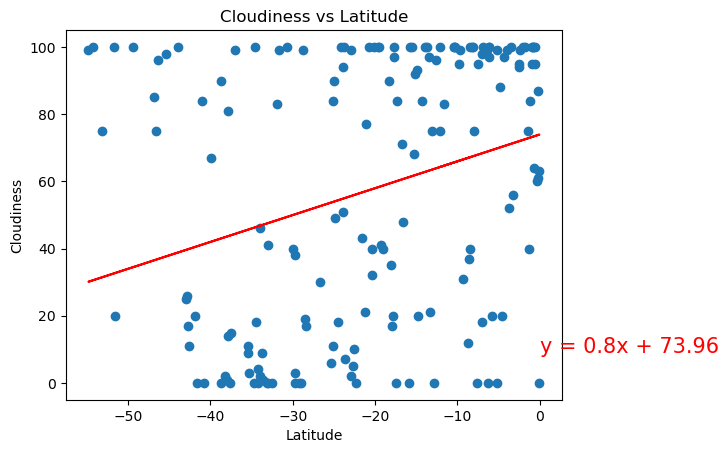

The r-value is: 0.2909299553032425


In [39]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Cloudiness']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Cloudiness vs Latitude")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:**3.	The cloudiness of cities depending on the latitude is almost non-existent apart from fact that the distribution of data points increases on one side of linear correlation that's found via the least number of squares method of finding a linear regression. Both the northern and southern hemisphere reflect this property and a lack of linear dependency, and both lines found have a positive linear regression and a very weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

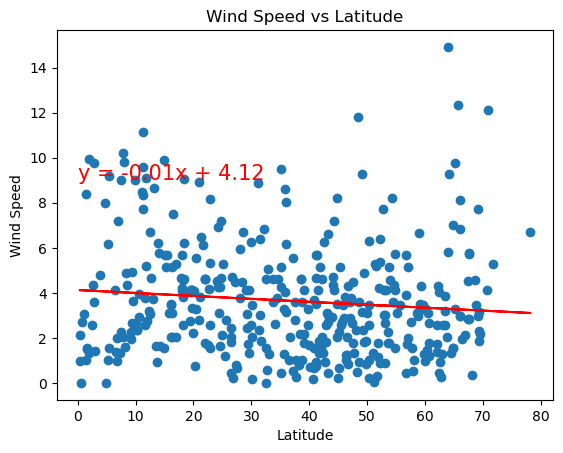

The r-value is: -0.10144619177669102


In [38]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values =northern_hemi_df['Wind Speed']


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Wind Speed vs Latitude")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f'The r-value is: {rvalue}')

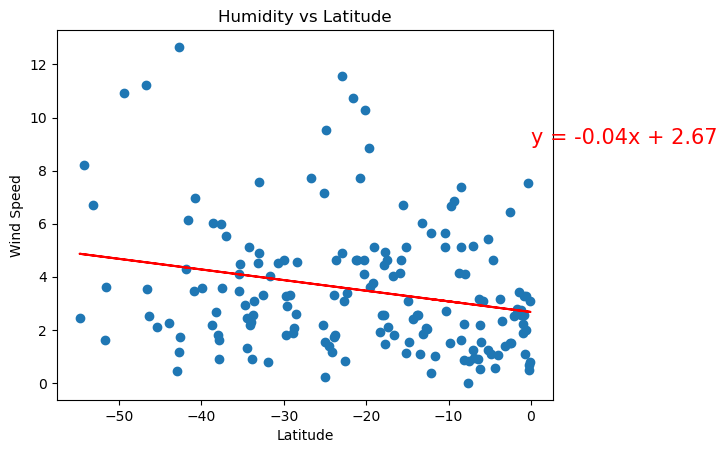

The r^2 value is: 0.05558087029992019


In [37]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values =southern_hemi_df['Wind Speed']

(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Humidity vs Latitude")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f'The r^2 value is: {rvalue**2}')

**Discussion about the linear relationship:** 
4.	The wind speed versus latitude is interesting because even though the data points are more clustered together, they have an even weaker correlation factor than the cloudiness versus latitude. The northern hemisphere has an almost flat line correlation (0 slope) and almost loses all regressive value. The southern hemisphere is negative but has data clusters that can't be encapsulated by the regression at all.
